In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [4]:
!ls ./drive/datasets/facial_recog

facial_recog_model1.h5	np_arrays_test_y.npy   np_array_train_x.npy
facial_recog_model.h5	np_arrays_train_y.npy
fer2013.csv		np_array_test_x.npy


In [0]:
#https://www.kaggle.com/c/3364/download/fer2013.tar.gz

 **Download dataset from **>> ***https://www.kaggle.com/c/3364/download/fer2013.tar.gz***

In [0]:
#importing dependecies to create dataset
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [0]:
# Reading data from csv
data= pd.read_csv("./drive/datasets/facial_recog/fer2013.csv")

In [8]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


***There are seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).***

In [9]:
# Gives all unique value of the emotion
data["emotion"].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [10]:
# Gives all unique value of the Usage
data["Usage"].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [61]:
# To check any missing values
data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [60]:
# To check how the dataset is divided into various categories
data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

**Creating the Traing data set**

In [0]:
train = data[["emotion", "pixels"]][data["Usage"]=="Training"]

In [0]:
train["pixels"] = train["pixels"].apply(lambda x: np.array([int(p) for p in x.split()]))

In [0]:
train_x = np.vstack(train["pixels"].values)

In [0]:
train_y =np.array(train["emotion"].values)

In [79]:
train_x[:5]

array([[ 70,  80,  82, ..., 106, 109,  82],
       [151, 150, 147, ..., 193, 183, 184],
       [231, 212, 156, ...,  88, 110, 152],
       [ 24,  32,  36, ..., 142, 143, 142],
       [  4,   0,   0, ...,  30,  29,  30]])

In [78]:
train_y[:5]

array([0, 0, 2, 4, 6])

In [108]:
from keras.utils import np_utils

train_y = np_utils.to_categorical(train_y)

Using TensorFlow backend.


In [0]:
train_x=train_x.reshape(-1,48,48,1)

In [89]:
train_x.shape

(28709, 48, 48, 1)

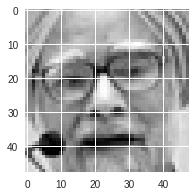

In [107]:
import seaborn as sns

plt.figure(0, figsize=(3,3))
plt.imshow(train_x[1,:,:,0],cmap="gray")
plt.show()

**Creating the Testing data set**

In [0]:
test = data[["emotion", "pixels"]][data["Usage"]=="PublicTest"]

In [0]:
test["pixels"] = test["pixels"].apply(lambda x: np.array([int(p) for p in x.split()]))

In [0]:
test_x = np.vstack(test["pixels"].values)

In [0]:
test_y =np.array(test["emotion"].values)

In [84]:
test_x[:5]

array([[254, 254, 254, ...,  42, 129, 180],
       [156, 184, 198, ..., 172, 167, 161],
       [ 69, 118,  61, ...,  88,  87,  90],
       [205, 203, 236, ...,  43,  82,  86],
       [ 87,  79,  74, ...,  41,  34,  32]])

In [85]:
test_y[:5]

array([0, 1, 4, 6, 3])

In [0]:
from keras.utils import np_utils

test_y = np_utils.to_categorical(test_y)

In [0]:
test_x=test_x.reshape(-1,48,48,1)

In [91]:
test_x.shape

(3589, 48, 48, 1)

**Save the numpy array, to reduce the computation needed for extracting and preprocessing**

In [0]:
np.save('./drive/datasets/facial_recog/np_array_train_x.npy',train_x)
np.save('./drive/datasets/facial_recog/np_arrays_train_y.npy',train_y)

np.save('./drive/datasets/facial_recog/np_array_test_x.npy',test_x)
np.save('./drive/datasets/facial_recog/np_arrays_test_y.npy',test_y)

**Now Numpy array can be loaded from disk and used**

In [0]:
train_x= np.load('./drive/datasets/facial_recog/np_array_train_x.npy')
train_y= np.load('./drive/datasets/facial_recog/np_arrays_train_y.npy')

test_x= np.load('./drive/datasets/facial_recog/np_array_test_x.npy')
test_y= np.load('./drive/datasets/facial_recog/np_arrays_test_y.npy')

In [7]:
! free -m

              total        used        free      shared  buff/cache   available
Mem:          13029        1033         460         247       11535       11500
Swap:             0           0           0


***Creating the Model***

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (48,48,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(7, activation = "softmax"))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
__________

In [0]:
# Define the optimizer
from keras.optimizers import RMSprop
from keras.optimizers import Adam,SGD
optimizer = SGD(lr=0.01, momentum=0.9,nesterov=True)
#optimizer = RMSprop(lr=0.01)

In [0]:
# Set a learning rate annealer
#this is to reduce the learning rate after some patience with some factor till min_lr

from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.0001)

In [0]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:
epochs = 30
batch_size = 100

nb_train_samples=int(train_x.shape[0])
nb_validation_samples=int(test_x.shape[0])

steps_per_epoch=nb_train_samples // batch_size
validation_steps=nb_validation_samples // batch_size

In [13]:
print(nb_train_samples)
print(nb_validation_samples)
print(steps_per_epoch)
print(validation_steps)

28709
3589
287
35


**Using Keras ImageDataGenerator for image augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


Use of  ***fit_generator***  and ***predict_genrator*** with custom data generator functions which can load images to memory duuring training and prediction.

There is ***ImageDataGenerator()***  in Keras which provides one such generator, which we can create using ***flow()*** or ***flow_from_directory***

[>>flow and flow from directory](https://towardsdatascience.com/keras-a-thing-you-should-know-about-keras-if-you-plan-to-train-a-deep-learning-model-on-a-large-fdd63ce66bd2)

In [0]:
train_generator = train_datagen.flow(train_x, train_y, batch_size=batch_size)
validation_generator = val_datagen.flow(test_x, test_y, batch_size=batch_size)

In [19]:
! free -m

              total        used        free      shared  buff/cache   available
Mem:          13029        1335         155         247       11537       11197
Swap:             0           0           0


In [17]:
# Fit the model
history=model.fit_generator(
    train_generator, 
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[learning_rate_reduction]
)

Epoch 1/30
287/287 [==============================] - 20s 71ms/step - loss: 1.8101 - acc: 0.2496 - val_loss: 1.7550 - val_acc: 0.2731
Epoch 2/30
287/287 [==============================] - 18s 64ms/step - loss: 1.7414 - acc: 0.2911 - val_loss: 1.6860 - val_acc: 0.3446
Epoch 3/30
 28/287 [=>............................] - ETA: 15s - loss: 1.7003 - acc: 0.3271

287/287 [==============================] - 18s 64ms/step - loss: 1.6761 - acc: 0.3341 - val_loss: 1.6053 - val_acc: 0.3723
Epoch 4/30
287/287 [==============================] - 18s 64ms/step - loss: 1.6162 - acc: 0.3650 - val_loss: 1.5297 - val_acc: 0.4080
Epoch 5/30
 55/287 [====>.........................] - ETA: 13s - loss: 1.5802 - acc: 0.3787

287/287 [==============================] - 18s 64ms/step - loss: 1.5586 - acc: 0.3937 - val_loss: 1.4627 - val_acc: 0.4377
Epoch 6/30
287/287 [==============================] - 19s 65ms/step - loss: 1.5083 - acc: 0.4150 - val_loss: 1.4223 - val_acc: 0.4431
Epoch 7/30
 62/287 [=====>........................] - ETA: 13s - loss: 1.4806 - acc: 0.4347

287/287 [==============================] - 19s 65ms/step - loss: 1.4612 - acc: 0.4384 - val_loss: 1.3796 - val_acc: 0.4671
Epoch 8/30
287/287 [==============================] - 19s 65ms/step - loss: 1.4316 - acc: 0.4453 - val_loss: 1.3569 - val_acc: 0.4751
Epoch 9/30
 64/287 [=====>........................] - ETA: 13s - loss: 1.3919 - acc: 0.4620

287/287 [==============================] - 19s 65ms/step - loss: 1.3994 - acc: 0.4635 - val_loss: 1.3410 - val_acc: 0.4791
Epoch 10/30
287/287 [==============================] - 19s 65ms/step - loss: 1.3745 - acc: 0.4729 - val_loss: 1.3026 - val_acc: 0.5031
Epoch 11/30
 66/287 [=====>........................] - ETA: 12s - loss: 1.3630 - acc: 0.4736

287/287 [==============================] - 18s 64ms/step - loss: 1.3576 - acc: 0.4800 - val_loss: 1.2972 - val_acc: 0.5123
Epoch 12/30
287/287 [==============================] - 19s 65ms/step - loss: 1.3289 - acc: 0.4936 - val_loss: 1.2554 - val_acc: 0.5257
Epoch 13/30
 67/287 [======>.......................] - ETA: 12s - loss: 1.3072 - acc: 0.5035

287/287 [==============================] - 19s 65ms/step - loss: 1.3035 - acc: 0.5025 - val_loss: 1.2605 - val_acc: 0.5226
Epoch 14/30
287/287 [==============================] - 19s 65ms/step - loss: 1.2865 - acc: 0.5094 - val_loss: 1.2375 - val_acc: 0.5246
Epoch 15/30
 66/287 [=====>........................] - ETA: 12s - loss: 1.2815 - acc: 0.5062

287/287 [==============================] - 19s 64ms/step - loss: 1.2718 - acc: 0.5122 - val_loss: 1.2238 - val_acc: 0.5346
Epoch 16/30
287/287 [==============================] - 19s 65ms/step - loss: 1.2559 - acc: 0.5179 - val_loss: 1.1975 - val_acc: 0.5483
Epoch 17/30
 67/287 [======>.......................] - ETA: 12s - loss: 1.2286 - acc: 0.5355

287/287 [==============================] - 19s 65ms/step - loss: 1.2305 - acc: 0.5302 - val_loss: 1.1985 - val_acc: 0.5471
Epoch 18/30
287/287 [==============================] - 19s 65ms/step - loss: 1.2266 - acc: 0.5332 - val_loss: 1.1790 - val_acc: 0.5474
Epoch 19/30
 67/287 [======>.......................] - ETA: 12s - loss: 1.1966 - acc: 0.5493

287/287 [==============================] - 19s 65ms/step - loss: 1.2066 - acc: 0.5391 - val_loss: 1.1721 - val_acc: 0.5531
Epoch 20/30
287/287 [==============================] - 19s 65ms/step - loss: 1.1972 - acc: 0.5412 - val_loss: 1.1741 - val_acc: 0.5486
Epoch 21/30
 66/287 [=====>........................] - ETA: 12s - loss: 1.1780 - acc: 0.5505

287/287 [==============================] - 18s 64ms/step - loss: 1.1831 - acc: 0.5508 - val_loss: 1.1654 - val_acc: 0.5629
Epoch 22/30
287/287 [==============================] - 19s 65ms/step - loss: 1.1741 - acc: 0.5535 - val_loss: 1.1590 - val_acc: 0.5617
Epoch 23/30
 67/287 [======>.......................] - ETA: 12s - loss: 1.1727 - acc: 0.5536

287/287 [==============================] - 18s 64ms/step - loss: 1.1669 - acc: 0.5575 - val_loss: 1.1441 - val_acc: 0.5626
Epoch 24/30
287/287 [==============================] - 19s 65ms/step - loss: 1.1512 - acc: 0.5608 - val_loss: 1.1513 - val_acc: 0.5680
Epoch 25/30
 66/287 [=====>........................] - ETA: 12s - loss: 1.1395 - acc: 0.5721

287/287 [==============================] - 19s 65ms/step - loss: 1.1487 - acc: 0.5673 - val_loss: 1.1502 - val_acc: 0.5546
Epoch 26/30
287/287 [==============================] - 19s 65ms/step - loss: 1.1341 - acc: 0.5705 - val_loss: 1.1261 - val_acc: 0.5683
Epoch 27/30
 67/287 [======>.......................] - ETA: 12s - loss: 1.1403 - acc: 0.5628

287/287 [==============================] - 18s 64ms/step - loss: 1.1231 - acc: 0.5725 - val_loss: 1.1254 - val_acc: 0.5749
Epoch 28/30
287/287 [==============================] - 19s 65ms/step - loss: 1.1192 - acc: 0.5772 - val_loss: 1.1258 - val_acc: 0.5717
Epoch 29/30
 65/287 [=====>........................] - ETA: 12s - loss: 1.1322 - acc: 0.5741

287/287 [==============================] - 19s 65ms/step - loss: 1.1131 - acc: 0.5828 - val_loss: 1.1237 - val_acc: 0.5703
Epoch 30/30
287/287 [==============================] - 19s 65ms/step - loss: 1.0948 - acc: 0.5849 - val_loss: 1.1155 - val_acc: 0.5774


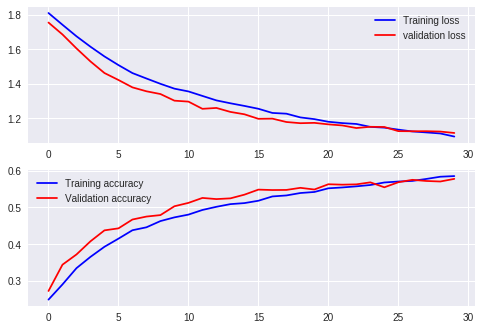

In [18]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [19]:
model.evaluate_generator(train_generator,steps_per_epoch)

[0.9755028583862225, 0.6408710807873397]

In [20]:
model.evaluate_generator(validation_generator,validation_steps)

[1.1098559481757029, 0.5777142856802259]

In [0]:
model.save('./drive/datasets/facial_recog/facial_recog_model.h5')

**You can train this model further by assigning it to your own weights saved earlier.**

In [0]:
from keras.models import load_model

new_model = load_model('./drive/datasets/facial_recog/facial_recog_model.h5')

In [0]:
epochs = 60
batch_size = 100

nb_train_samples=int(train_x.shape[0])
nb_validation_samples=int(test_x.shape[0])

steps_per_epoch=nb_train_samples // batch_size
validation_steps=nb_validation_samples // batch_size

In [26]:
print(nb_train_samples)
print(nb_validation_samples)
print(steps_per_epoch)
print(validation_steps)
print(epochs)

28709
3589
287
35
60


In [27]:
# Calling fit_genrator on new_model
history=new_model.fit_generator(
    train_generator, 
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[learning_rate_reduction]
)

Epoch 1/60
287/287 [==============================] - 18s 63ms/step - loss: 1.0928 - acc: 0.5881 - val_loss: 1.1086 - val_acc: 0.5840
Epoch 2/60
287/287 [==============================] - 18s 64ms/step - loss: 1.0841 - acc: 0.5878 - val_loss: 1.1097 - val_acc: 0.5746
Epoch 3/60
 30/287 [==>...........................] - ETA: 15s - loss: 1.0296 - acc: 0.6133

287/287 [==============================] - 18s 64ms/step - loss: 1.0752 - acc: 0.5919 - val_loss: 1.1201 - val_acc: 0.5791
Epoch 4/60
287/287 [==============================] - 18s 64ms/step - loss: 1.0733 - acc: 0.5914 - val_loss: 1.0930 - val_acc: 0.5906
Epoch 5/60
 56/287 [====>.........................] - ETA: 13s - loss: 1.0500 - acc: 0.6046

287/287 [==============================] - 18s 64ms/step - loss: 1.0620 - acc: 0.5976 - val_loss: 1.0981 - val_acc: 0.5780
Epoch 6/60
287/287 [==============================] - 19s 65ms/step - loss: 1.0593 - acc: 0.6012 - val_loss: 1.0950 - val_acc: 0.5803
Epoch 7/60
 60/287 [=====>........................] - ETA: 13s - loss: 1.0639 - acc: 0.6012

287/287 [==============================] - 19s 65ms/step - loss: 1.0421 - acc: 0.6048 - val_loss: 1.0931 - val_acc: 0.5837

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
Epoch 8/60
283/287 [============================>.] - ETA: 0s - loss: 1.0069 - acc: 0.6174

287/287 [==============================] - 19s 65ms/step - loss: 1.0070 - acc: 0.6179 - val_loss: 1.0723 - val_acc: 0.5960
Epoch 9/60
287/287 [==============================] - 18s 64ms/step - loss: 0.9900 - acc: 0.6289 - val_loss: 1.0718 - val_acc: 0.5897
Epoch 10/60
116/287 [===========>..................] - ETA: 10s - loss: 0.9870 - acc: 0.6317

287/287 [==============================] - 19s 65ms/step - loss: 0.9858 - acc: 0.6309 - val_loss: 1.0667 - val_acc: 0.5980
Epoch 11/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9717 - acc: 0.6354 - val_loss: 1.0643 - val_acc: 0.5986
Epoch 12/60
 77/287 [=======>......................] - ETA: 12s - loss: 0.9842 - acc: 0.6251

287/287 [==============================] - 19s 65ms/step - loss: 0.9722 - acc: 0.6340 - val_loss: 1.0618 - val_acc: 0.5986
Epoch 13/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9645 - acc: 0.6403 - val_loss: 1.0776 - val_acc: 0.5937
Epoch 14/60
 70/287 [======>.......................] - ETA: 12s - loss: 0.9568 - acc: 0.6409

287/287 [==============================] - 19s 65ms/step - loss: 0.9594 - acc: 0.6386 - val_loss: 1.0632 - val_acc: 0.6006
Epoch 15/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9603 - acc: 0.6379 - val_loss: 1.0652 - val_acc: 0.5986
Epoch 16/60
 64/287 [=====>........................] - ETA: 12s - loss: 0.9511 - acc: 0.6434

287/287 [==============================] - 19s 65ms/step - loss: 0.9604 - acc: 0.6405 - val_loss: 1.0834 - val_acc: 0.5951
Epoch 17/60
287/287 [==============================] - 18s 64ms/step - loss: 0.9544 - acc: 0.6400 - val_loss: 1.0725 - val_acc: 0.5994

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
Epoch 18/60
 54/287 [====>.........................] - ETA: 13s - loss: 0.9560 - acc: 0.6391

287/287 [==============================] - 19s 65ms/step - loss: 0.9456 - acc: 0.6460 - val_loss: 1.0652 - val_acc: 0.6046
Epoch 19/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9373 - acc: 0.6466 - val_loss: 1.0678 - val_acc: 0.5977
Epoch 20/60
 62/287 [=====>........................] - ETA: 12s - loss: 0.9358 - acc: 0.6548

287/287 [==============================] - 18s 64ms/step - loss: 0.9455 - acc: 0.6438 - val_loss: 1.0650 - val_acc: 0.6051
Epoch 21/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9358 - acc: 0.6472 - val_loss: 1.0560 - val_acc: 0.6060
Epoch 22/60
 65/287 [=====>........................] - ETA: 12s - loss: 0.9291 - acc: 0.6477

287/287 [==============================] - 19s 65ms/step - loss: 0.9364 - acc: 0.6480 - val_loss: 1.0642 - val_acc: 0.6011
Epoch 23/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9274 - acc: 0.6541 - val_loss: 1.0589 - val_acc: 0.6057
Epoch 24/60
 70/287 [======>.......................] - ETA: 12s - loss: 0.9637 - acc: 0.6422

287/287 [==============================] - 19s 65ms/step - loss: 0.9392 - acc: 0.6470 - val_loss: 1.0676 - val_acc: 0.6003

Epoch 00024: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 25/60
287/287 [==============================] - 18s 64ms/step - loss: 0.9309 - acc: 0.6513 - val_loss: 1.0690 - val_acc: 0.6000
Epoch 26/60
  9/287 [..............................] - ETA: 14s - loss: 0.9985 - acc: 0.6278

287/287 [==============================] - 19s 65ms/step - loss: 0.9366 - acc: 0.6486 - val_loss: 1.0710 - val_acc: 0.6020
Epoch 27/60
287/287 [==============================] - 18s 64ms/step - loss: 0.9314 - acc: 0.6495 - val_loss: 1.0574 - val_acc: 0.6057
Epoch 28/60
 54/287 [====>.........................] - ETA: 13s - loss: 0.9238 - acc: 0.6541

287/287 [==============================] - 18s 64ms/step - loss: 0.9242 - acc: 0.6528 - val_loss: 1.0639 - val_acc: 0.6034
Epoch 29/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9262 - acc: 0.6518 - val_loss: 1.0689 - val_acc: 0.6009
Epoch 30/60
 62/287 [=====>........................] - ETA: 12s - loss: 0.9168 - acc: 0.6605

287/287 [==============================] - 18s 64ms/step - loss: 0.9338 - acc: 0.6486 - val_loss: 1.0644 - val_acc: 0.6049
Epoch 31/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9265 - acc: 0.6527 - val_loss: 1.0677 - val_acc: 0.6029
Epoch 32/60
 64/287 [=====>........................] - ETA: 12s - loss: 0.9256 - acc: 0.6539

287/287 [==============================] - 19s 65ms/step - loss: 0.9233 - acc: 0.6548 - val_loss: 1.0646 - val_acc: 0.6114
Epoch 33/60
287/287 [==============================] - 19s 66ms/step - loss: 0.9295 - acc: 0.6520 - val_loss: 1.0617 - val_acc: 0.6057
Epoch 34/60
 64/287 [=====>........................] - ETA: 12s - loss: 0.9443 - acc: 0.6373

287/287 [==============================] - 19s 65ms/step - loss: 0.9274 - acc: 0.6489 - val_loss: 1.0581 - val_acc: 0.6049
Epoch 35/60
287/287 [==============================] - 18s 64ms/step - loss: 0.9294 - acc: 0.6521 - val_loss: 1.0647 - val_acc: 0.6097
Epoch 36/60
 64/287 [=====>........................] - ETA: 12s - loss: 0.9310 - acc: 0.6447

287/287 [==============================] - 19s 65ms/step - loss: 0.9294 - acc: 0.6502 - val_loss: 1.0644 - val_acc: 0.6040
Epoch 37/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9203 - acc: 0.6523 - val_loss: 1.0519 - val_acc: 0.6057
Epoch 38/60
 65/287 [=====>........................] - ETA: 12s - loss: 0.9231 - acc: 0.6542

287/287 [==============================] - 18s 64ms/step - loss: 0.9332 - acc: 0.6502 - val_loss: 1.0639 - val_acc: 0.6011
Epoch 39/60
287/287 [==============================] - 18s 64ms/step - loss: 0.9294 - acc: 0.6501 - val_loss: 1.0453 - val_acc: 0.6080
Epoch 40/60
 65/287 [=====>........................] - ETA: 12s - loss: 0.9341 - acc: 0.6546

287/287 [==============================] - 18s 64ms/step - loss: 0.9297 - acc: 0.6502 - val_loss: 1.0538 - val_acc: 0.6017
Epoch 41/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9335 - acc: 0.6500 - val_loss: 1.0626 - val_acc: 0.6017
Epoch 42/60
 65/287 [=====>........................] - ETA: 12s - loss: 0.9256 - acc: 0.6522

287/287 [==============================] - 18s 64ms/step - loss: 0.9301 - acc: 0.6499 - val_loss: 1.0585 - val_acc: 0.6086
Epoch 43/60
287/287 [==============================] - 18s 64ms/step - loss: 0.9225 - acc: 0.6551 - val_loss: 1.0590 - val_acc: 0.6026
Epoch 44/60
 63/287 [=====>........................] - ETA: 13s - loss: 0.9098 - acc: 0.6594

287/287 [==============================] - 19s 65ms/step - loss: 0.9224 - acc: 0.6553 - val_loss: 1.0558 - val_acc: 0.5980
Epoch 45/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9342 - acc: 0.6508 - val_loss: 1.0595 - val_acc: 0.6046
Epoch 46/60
 61/287 [=====>........................] - ETA: 12s - loss: 0.9182 - acc: 0.6605

287/287 [==============================] - 19s 65ms/step - loss: 0.9235 - acc: 0.6531 - val_loss: 1.0600 - val_acc: 0.6017
Epoch 47/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9261 - acc: 0.6536 - val_loss: 1.0610 - val_acc: 0.6051
Epoch 48/60
 65/287 [=====>........................] - ETA: 12s - loss: 0.9277 - acc: 0.6452

287/287 [==============================] - 18s 64ms/step - loss: 0.9307 - acc: 0.6490 - val_loss: 1.0560 - val_acc: 0.6037
Epoch 49/60
287/287 [==============================] - 18s 64ms/step - loss: 0.9251 - acc: 0.6523 - val_loss: 1.0577 - val_acc: 0.6117
Epoch 50/60
 69/287 [======>.......................] - ETA: 12s - loss: 0.9032 - acc: 0.6610

287/287 [==============================] - 18s 64ms/step - loss: 0.9187 - acc: 0.6538 - val_loss: 1.0652 - val_acc: 0.6026
Epoch 51/60
287/287 [==============================] - 18s 64ms/step - loss: 0.9229 - acc: 0.6559 - val_loss: 1.0552 - val_acc: 0.6094
Epoch 52/60
 65/287 [=====>........................] - ETA: 12s - loss: 0.9306 - acc: 0.6523

287/287 [==============================] - 19s 65ms/step - loss: 0.9240 - acc: 0.6536 - val_loss: 1.0720 - val_acc: 0.5954
Epoch 53/60
287/287 [==============================] - 18s 64ms/step - loss: 0.9183 - acc: 0.6586 - val_loss: 1.0650 - val_acc: 0.5994
Epoch 54/60
 65/287 [=====>........................] - ETA: 12s - loss: 0.9322 - acc: 0.6508

287/287 [==============================] - 19s 65ms/step - loss: 0.9234 - acc: 0.6501 - val_loss: 1.0620 - val_acc: 0.6063
Epoch 55/60
287/287 [==============================] - 18s 64ms/step - loss: 0.9302 - acc: 0.6536 - val_loss: 1.0516 - val_acc: 0.6071
Epoch 56/60
 62/287 [=====>........................] - ETA: 12s - loss: 0.9252 - acc: 0.6552

287/287 [==============================] - 18s 64ms/step - loss: 0.9235 - acc: 0.6530 - val_loss: 1.0503 - val_acc: 0.6077
Epoch 57/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9260 - acc: 0.6534 - val_loss: 1.0645 - val_acc: 0.6043
Epoch 58/60
 62/287 [=====>........................] - ETA: 12s - loss: 0.9061 - acc: 0.6631

287/287 [==============================] - 19s 65ms/step - loss: 0.9215 - acc: 0.6554 - val_loss: 1.0665 - val_acc: 0.6071
Epoch 59/60
287/287 [==============================] - 19s 65ms/step - loss: 0.9148 - acc: 0.6605 - val_loss: 1.0569 - val_acc: 0.6051
Epoch 60/60
 63/287 [=====>........................] - ETA: 12s - loss: 0.9258 - acc: 0.6506

287/287 [==============================] - 19s 65ms/step - loss: 0.9238 - acc: 0.6548 - val_loss: 1.0659 - val_acc: 0.5929


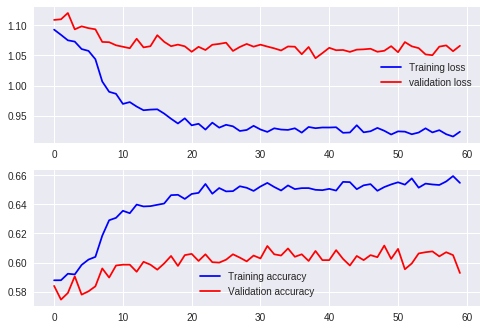

In [28]:
# Plot the loss and accuracy curves for training and validation on new_model
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [29]:
new_model.evaluate_generator(train_generator,steps_per_epoch)

[0.7659541260490019, 0.7248780486475715]

In [30]:
new_model.evaluate_generator(validation_generator,validation_steps)

[1.05628958770207, 0.6099999955722264]

In [0]:
new_model.save('./drive/datasets/facial_recog/facial_recog_model1.h5')

**You can see that after 20th epoch the model has stopped learning**